<h1 align="center">Modelo de Debye</h1>
<div align="right">Por David A. Miranda, PhD<br>Creado en 2020<br>Actualizado el 18 de abril de 2023</div>
<h2>1. Importa las librerias</h2>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## 2. Planteamiento del problema

La relajación de un dieléctrico cuando es sometido a un campo eléctrico externo depende de la frecuencia $\omega=2\pi f$ de la excitación externa, $i(t)=I_0sen(\omega t)$.  A frecuencias bajas la permitividad del medio tiende a un valor constante $\varepsilon_s$ y a frecuencias altas, a $\varepsilon_\infty$.  Para las frecuencias intermedias se observa una dispersión, la cual se puede describir, en el primer orden, como:

$$\varepsilon^* = \varepsilon_\infty + \frac{\varepsilon_s - \varepsilon_\infty}{1 + j\omega\tau} \qquad (1)$$

Donde $\tau$ es el tiempo de relajación del dieléctrico, es decir, el tiempo asociado al reordenamiento de las cargas eléctricas cuando se aplica un campo eléctrico al dieléctrico.

A la descripción de la permitividad eléctrica $\varepsilon^*$ con la ecuación $(1)$ se conoce como modelo de Debye.

Obtenga las representaciones de Bode y Nyquist para la permitividad eléctrica dada por la ecuación $(1)$, así como la conductividad eléctrida, dada por $\sigma = j\omega \varepsilon$ y la resistividad eléctrica, dada por $\rho = 1 / \sigma$.

## 3. Métodos y definiciones

In [2]:
dpi = 300

In [3]:
epsilon_s = 100e-6 # F/m^2
epsilon_i =  10e-6 # F/m^2
pi = np.pi
tau = 1e-4/(2*pi) # s
f = np.logspace(1, 7, 1000)
w = 2*pi*f

epsilon = epsilon_i + (epsilon_s - epsilon_i)/(1 + 1j*w*tau)

In [4]:
def plot_bode(f, y1, y2, y1_label='y1 axis', y2_label='y2 axis', fig=1, dpi=dpi):
    _ , ax1 = plt.subplots(dpi=dpi)
    color = 'tab:red'
    ax1.set_xlabel('Frecuencia [Hz]')
    ax1.set_ylabel(y1_label, color=color)
    ax1.semilogx(f,  y1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel(y2_label, color=color) 
    ax2.semilogx(f, y2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    _ = plt.title('Figura %d' % fig)

In [5]:
def plot_nyquist(x, y, xlabel=r'real', ylabel=r'-imag', fig=1):
    plt.figure(dpi=dpi)
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.gca().set_aspect('equal')
    y_max = 1.02*max([max(x), max(y)])
    x_min = min([0, min(x), min(y)])
    _ = plt.axis([x_min, y_max, x_min, y_max])
    _ = plt.title('Figura %d' % fig)

## 4. Gráficas de propiedades eléctricas

### 4.1. Parte real e imaginaria de la permitividad eléctrica

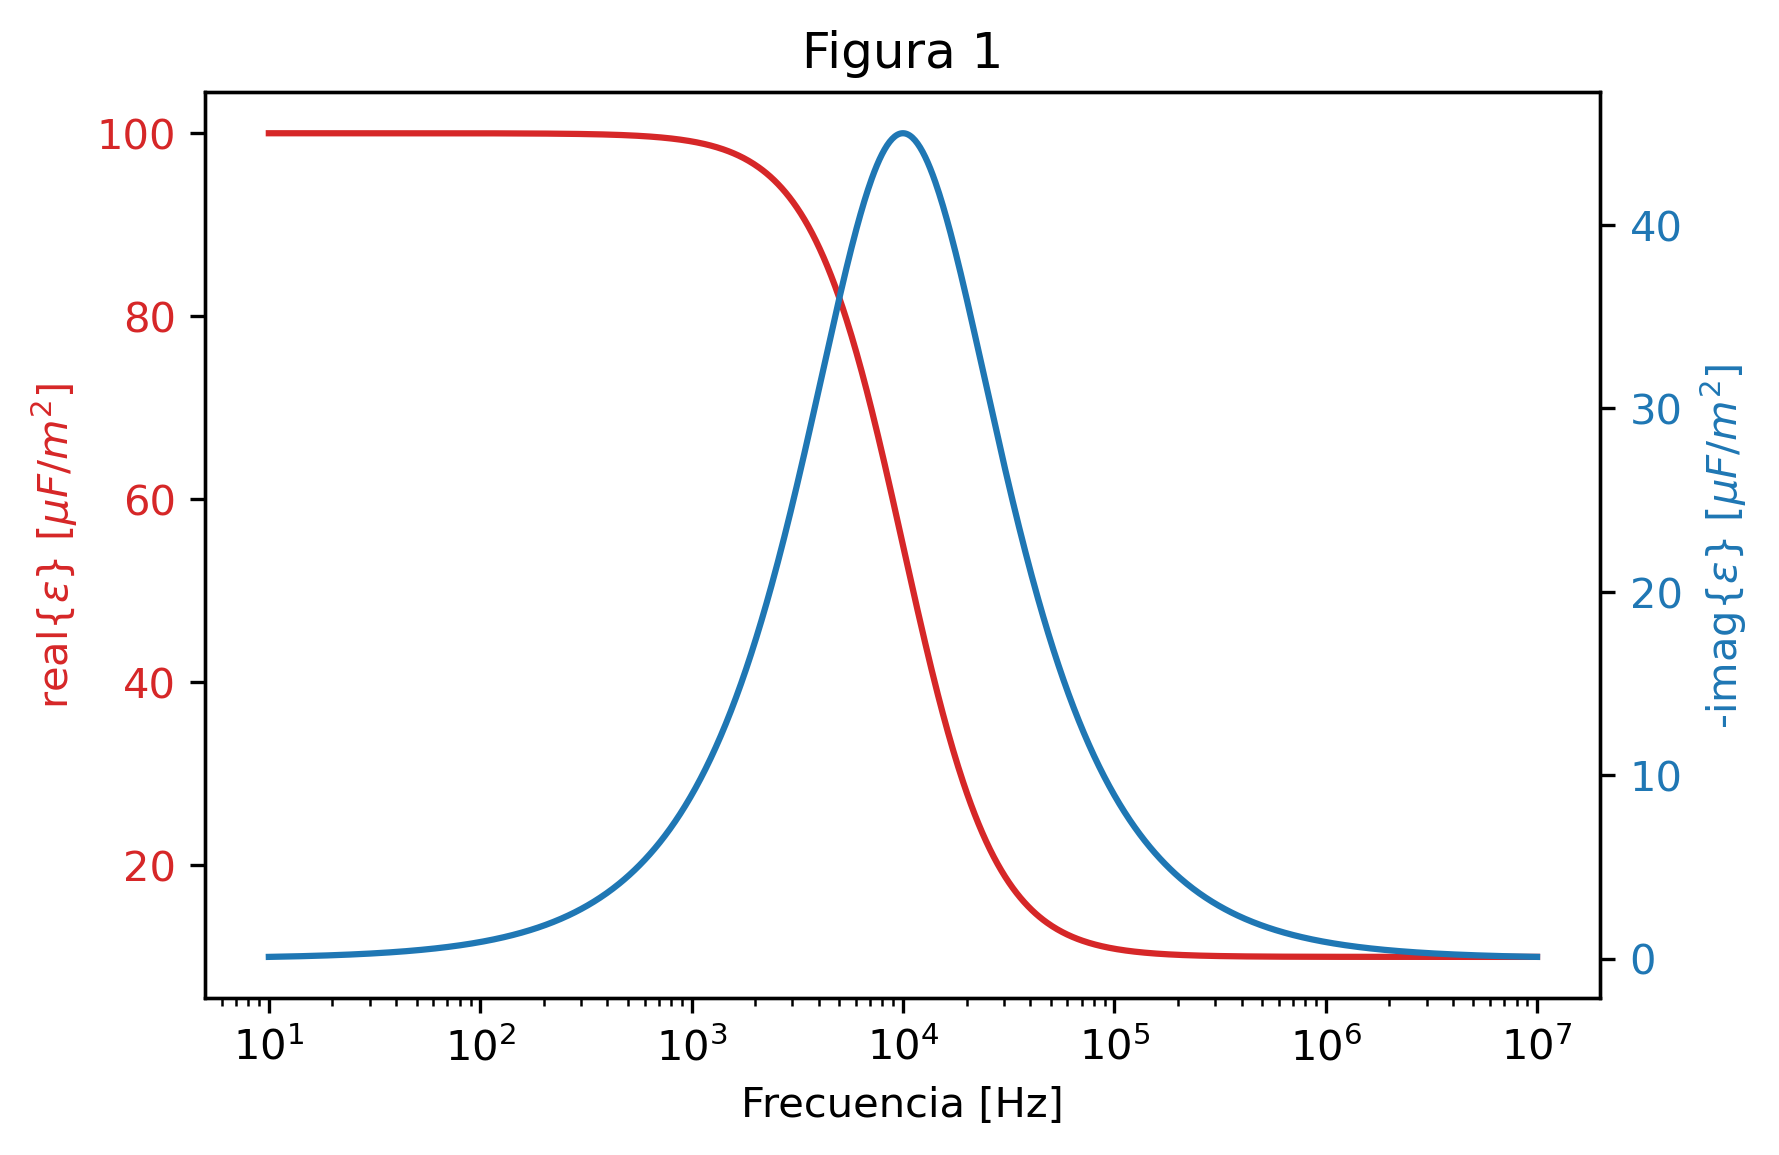

In [6]:
plot_bode(f, 1e6*epsilon.real, -1e6*epsilon.imag, 
            y1_label=r'real{$\varepsilon$} $[\mu F/m^2]$',
            y2_label=r'-imag{$\varepsilon$} $[\mu F/m^2]$',
            fig=1)

### 4.2. Magnitud y fase de la permitividad eléctrica

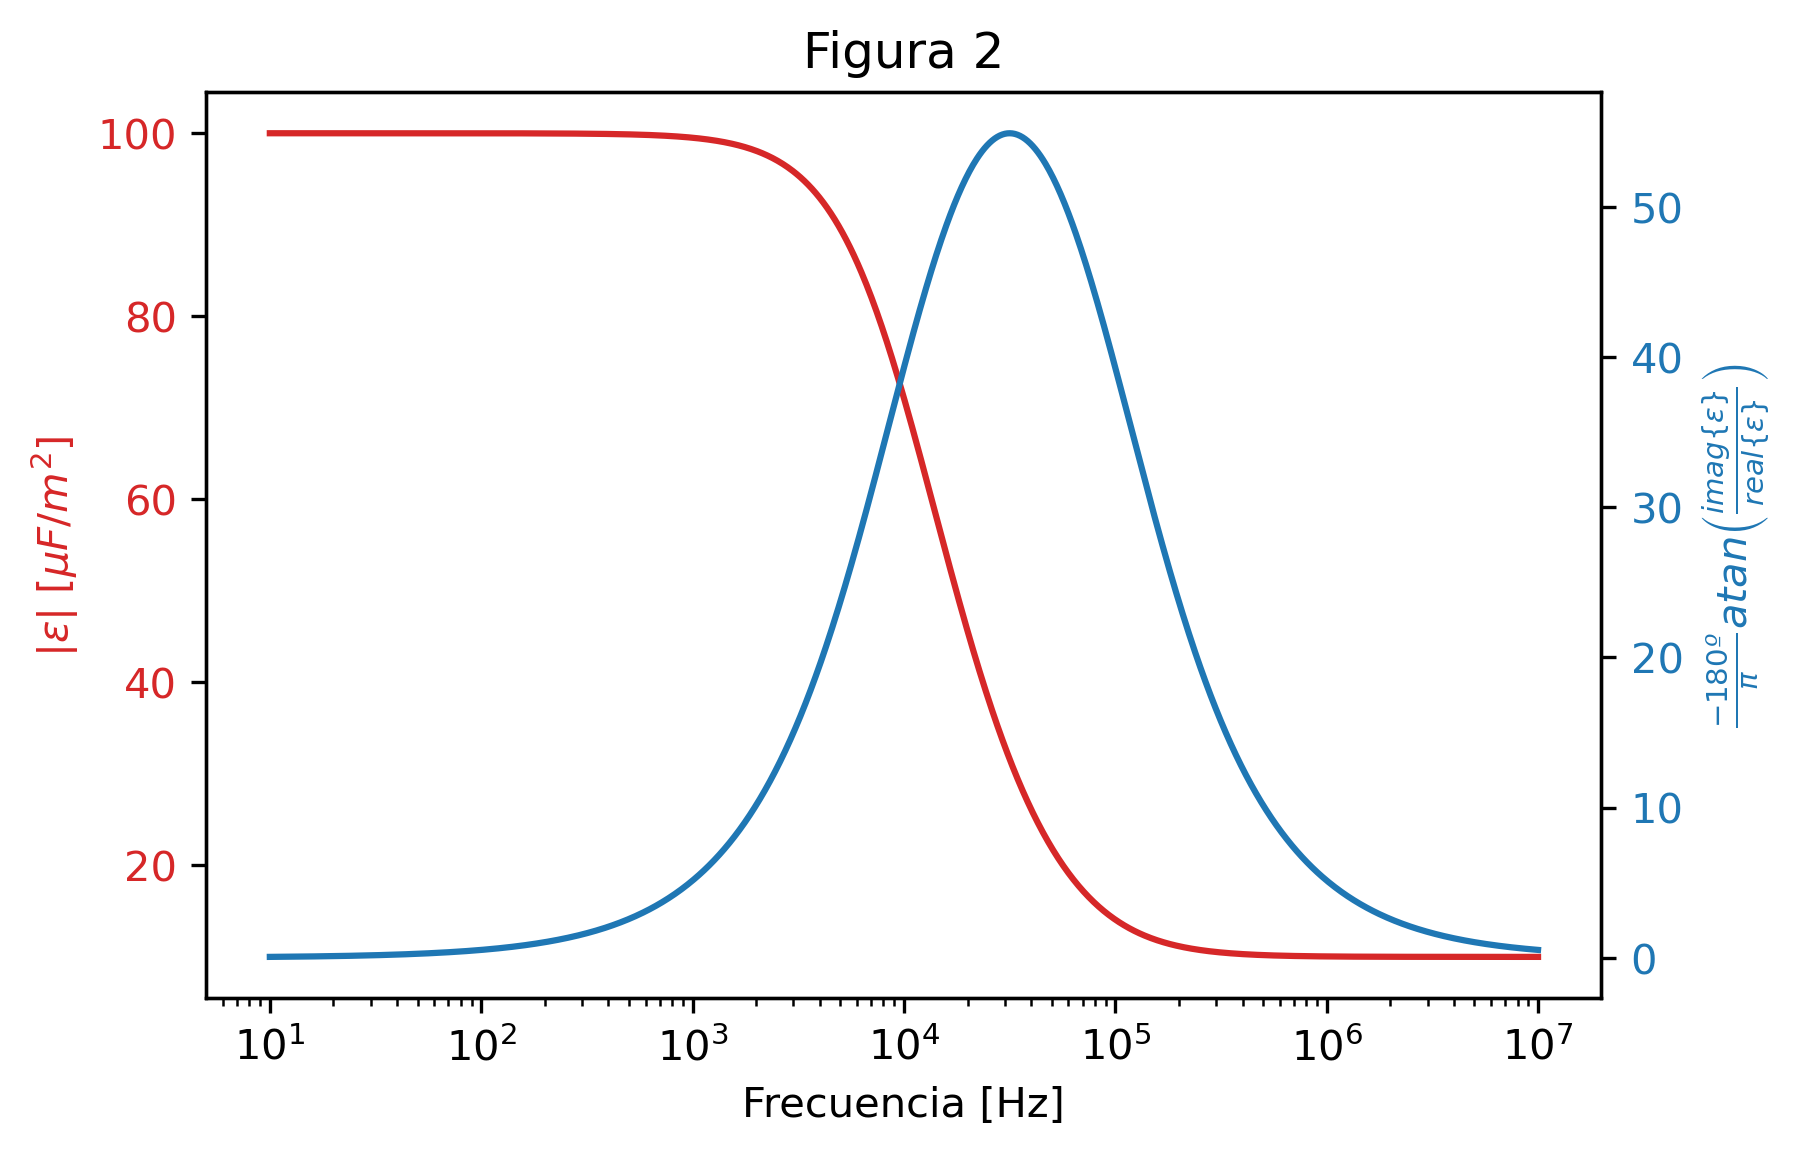

In [7]:
plot_bode(f, 1e6*np.abs(epsilon), -180/pi *np.angle(epsilon), 
            y1_label=r'$|\varepsilon|$ $[\mu F/m^2]$',
            y2_label=r'$\frac{-180º}{\pi}atan\left(\frac{imag\{\varepsilon\}}{real\{\varepsilon\}}\right)$',
            fig=2)

### 4.3. Diagrama de Nyquist de la permitividad eléctrica

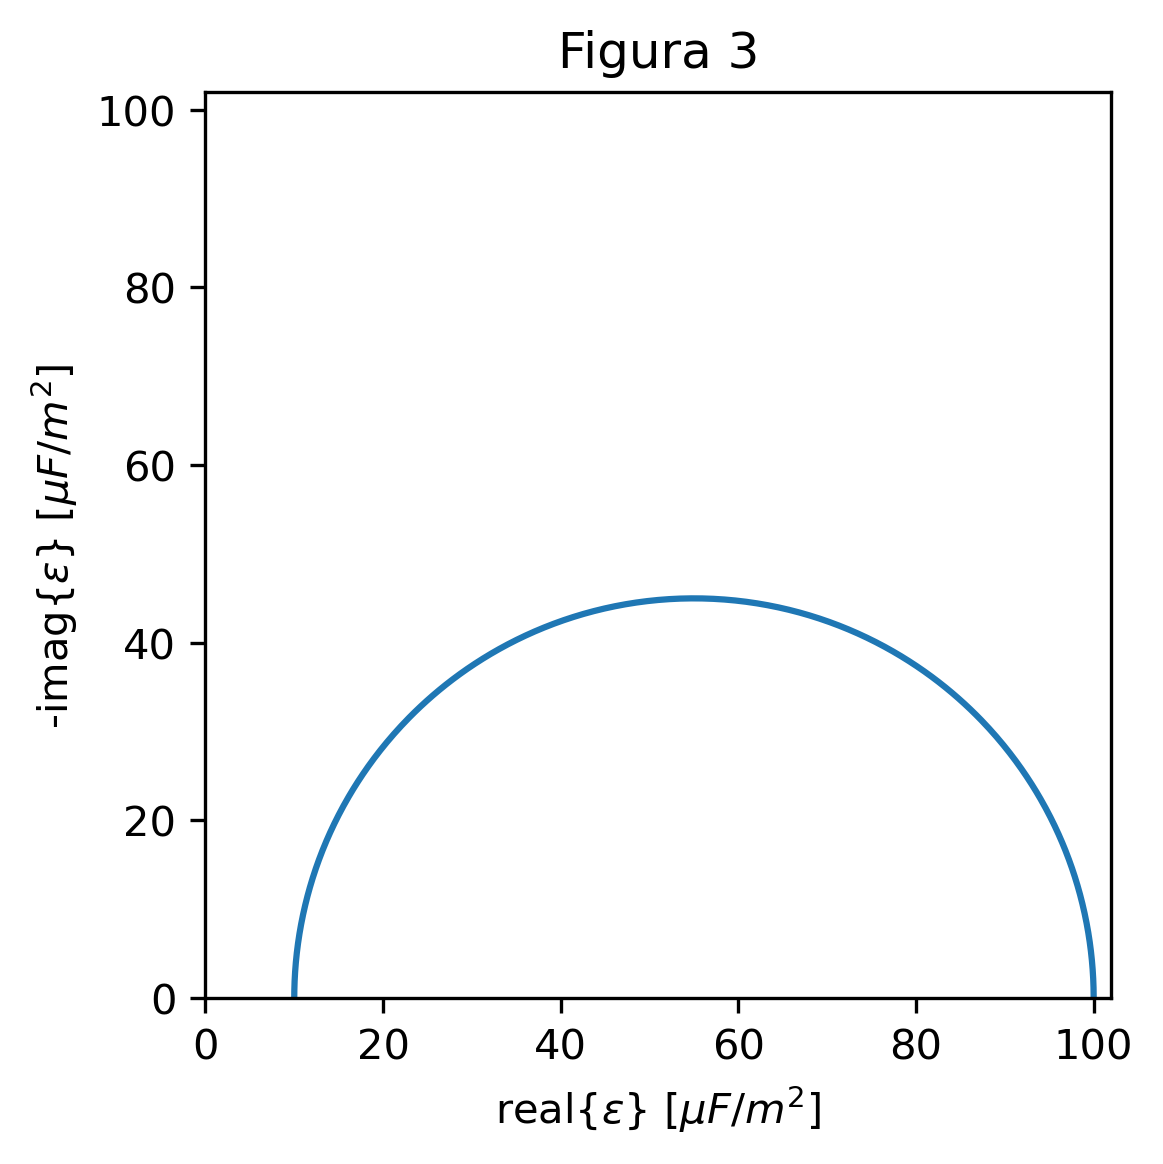

In [8]:
plot_nyquist(1e6*epsilon.real, -1e6*epsilon.imag, 
             xlabel=r'real{$\varepsilon$} $[\mu F/m^2]$', 
             ylabel=r'-imag{$\varepsilon$} $[\mu F/m^2]$', 
             fig=3)

### 4.4 Conductividad eléctrica
La permitividad compleja $\varepsilon^*$ se relacinoa con la conductividad compleja $\sigma^*$ por medio de la siguiente expresión,

$$\sigma^* = j\omega \varepsilon^*$$

In [9]:
sigma = 1j*w*epsilon

### 4.5. Parte real e imaginaria de la conductividad eléctrica

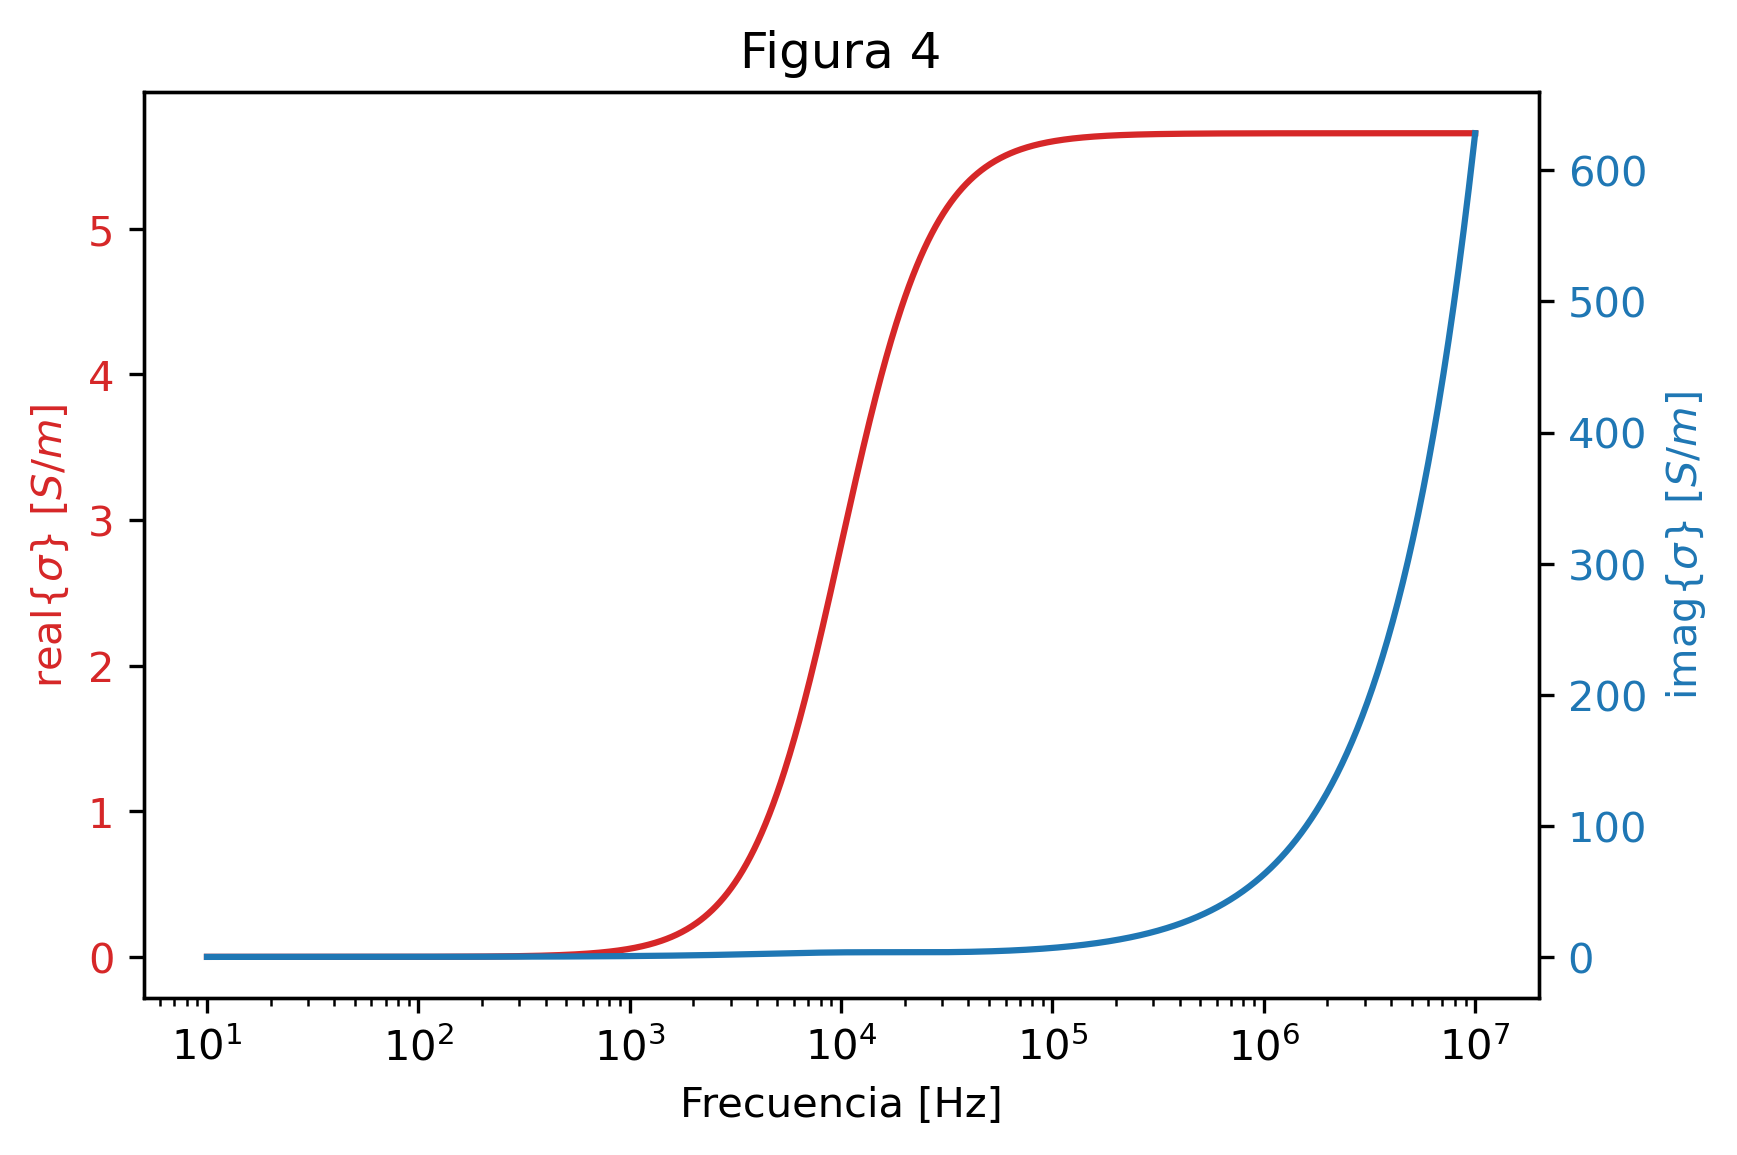

In [10]:
plot_bode(f, sigma.real, sigma.imag, 
            y1_label=r'real{$\sigma$} $[S/m]$',
            y2_label=r'imag{$\sigma$} $[S/m]$',
            fig=4)

### 4.6. Magnitud y fase de la conductividad eléctrica

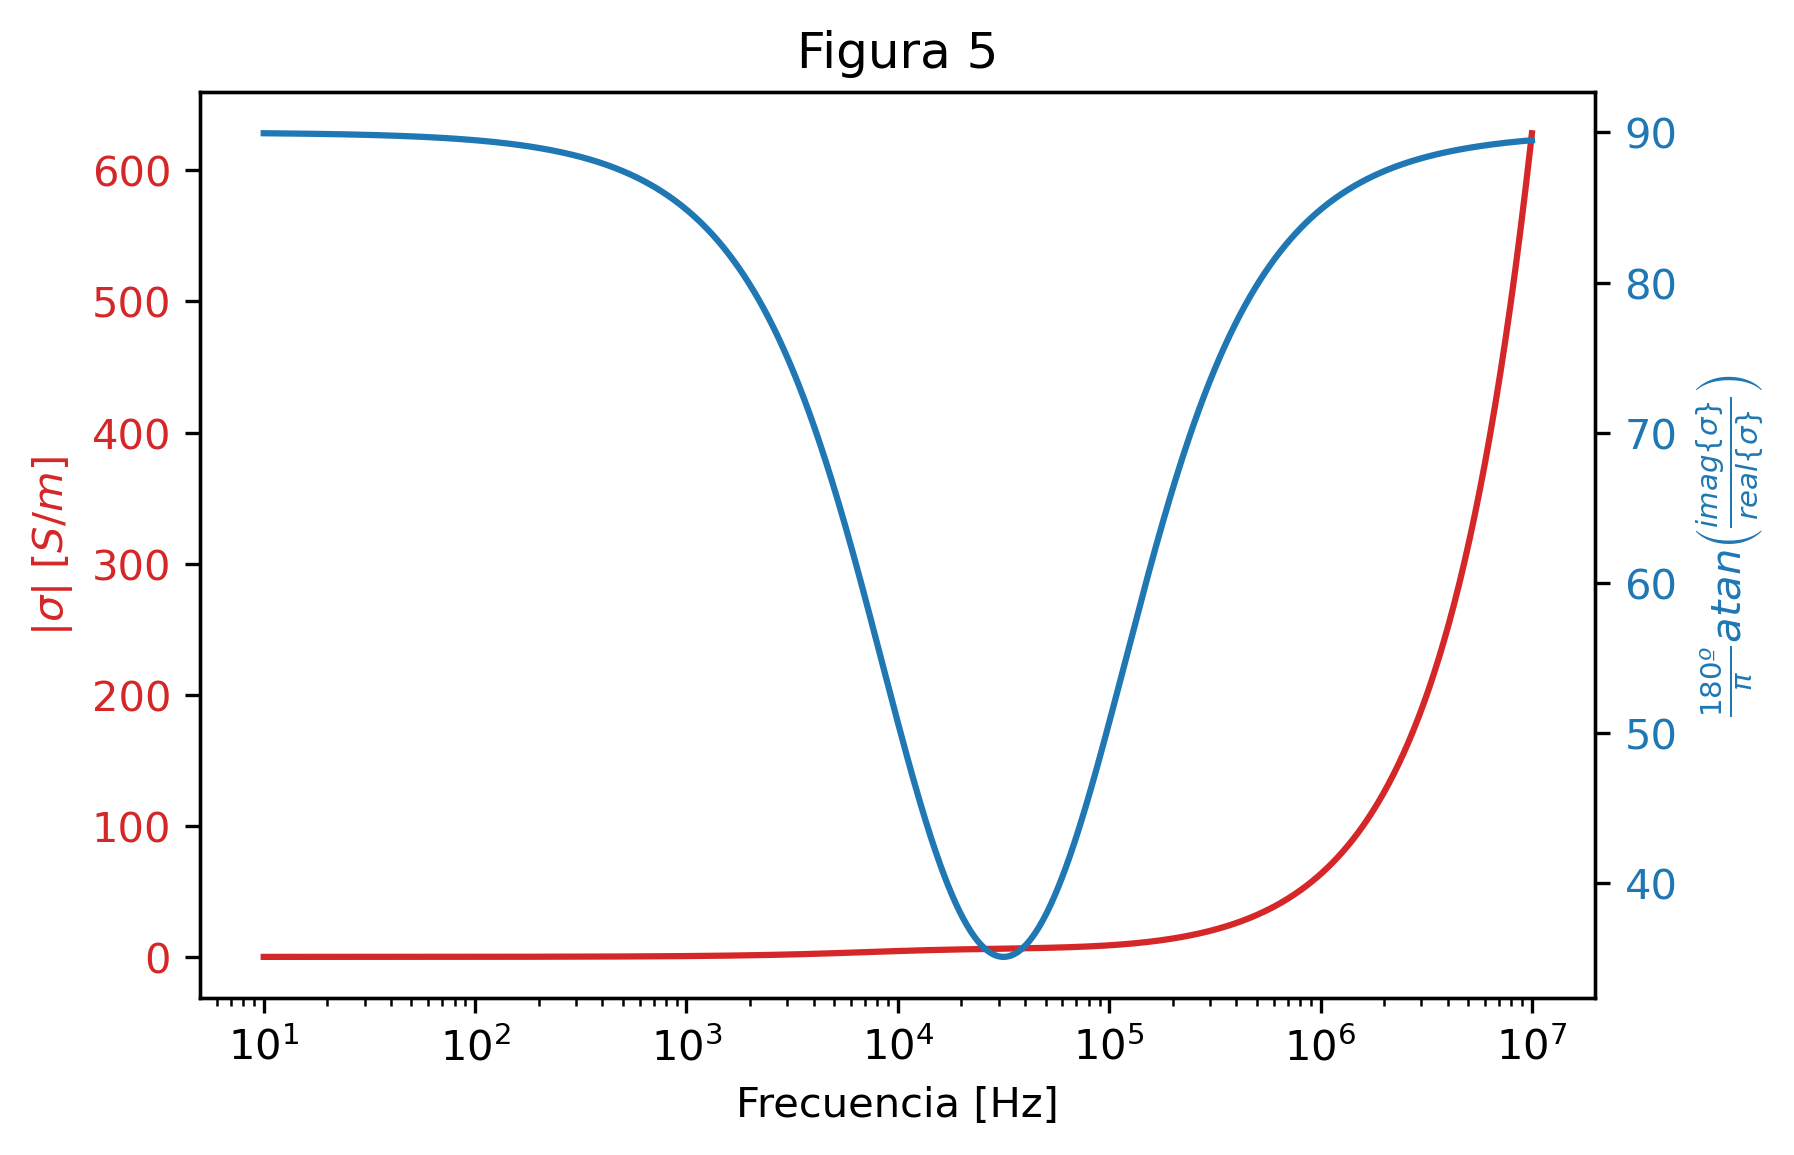

In [11]:
plot_bode(f, np.abs(sigma), 180/pi *np.angle(sigma), 
            y1_label=r'$|\sigma|$ $[S/m]$',
            y2_label=r'$\frac{180º}{\pi}atan\left(\frac{imag\{\sigma\}}{real\{\sigma\}}\right)$',
            fig=5)

### 4.7. Diagrama de Nyquist de la conductividad eléctrica

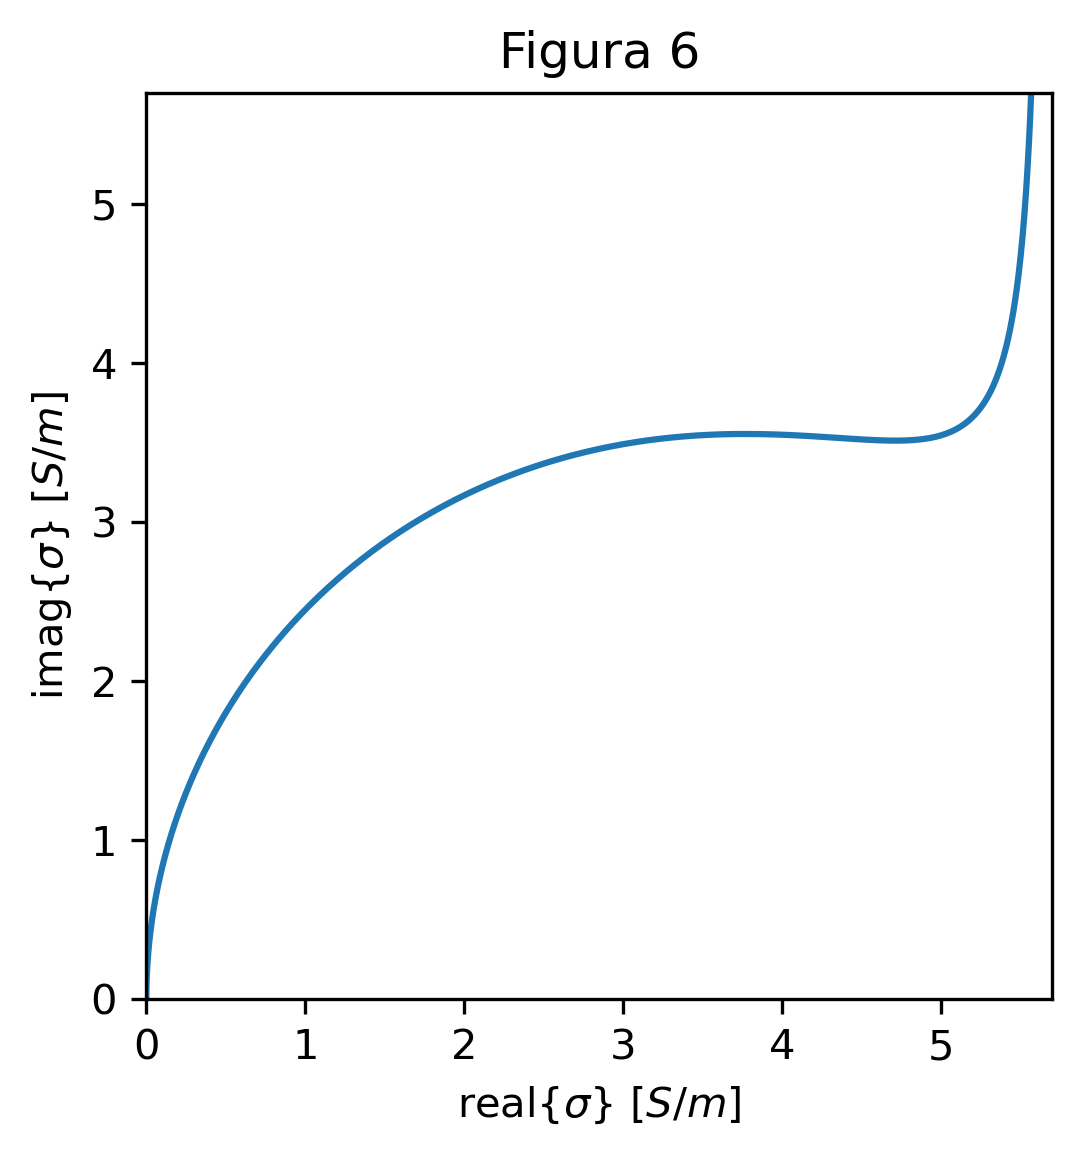

In [12]:
plot_nyquist(sigma.real, sigma.imag, 
             xlabel=r'real{$\sigma$} $[S/m]$', 
             ylabel=r'imag{$\sigma$} $[S/m]$', 
             fig=6)
_ = plt.axis([0, 5.7, 0, 5.7])

### 4.8. Resistividad eléctrica
La resistividad eléctirca compleja $\rho^*$ es el inverso de la conductividad eléctrica compleja.

In [13]:
rho = 1/sigma

### 4.9. Parte real e imaginaria de la resistividad eléctrica

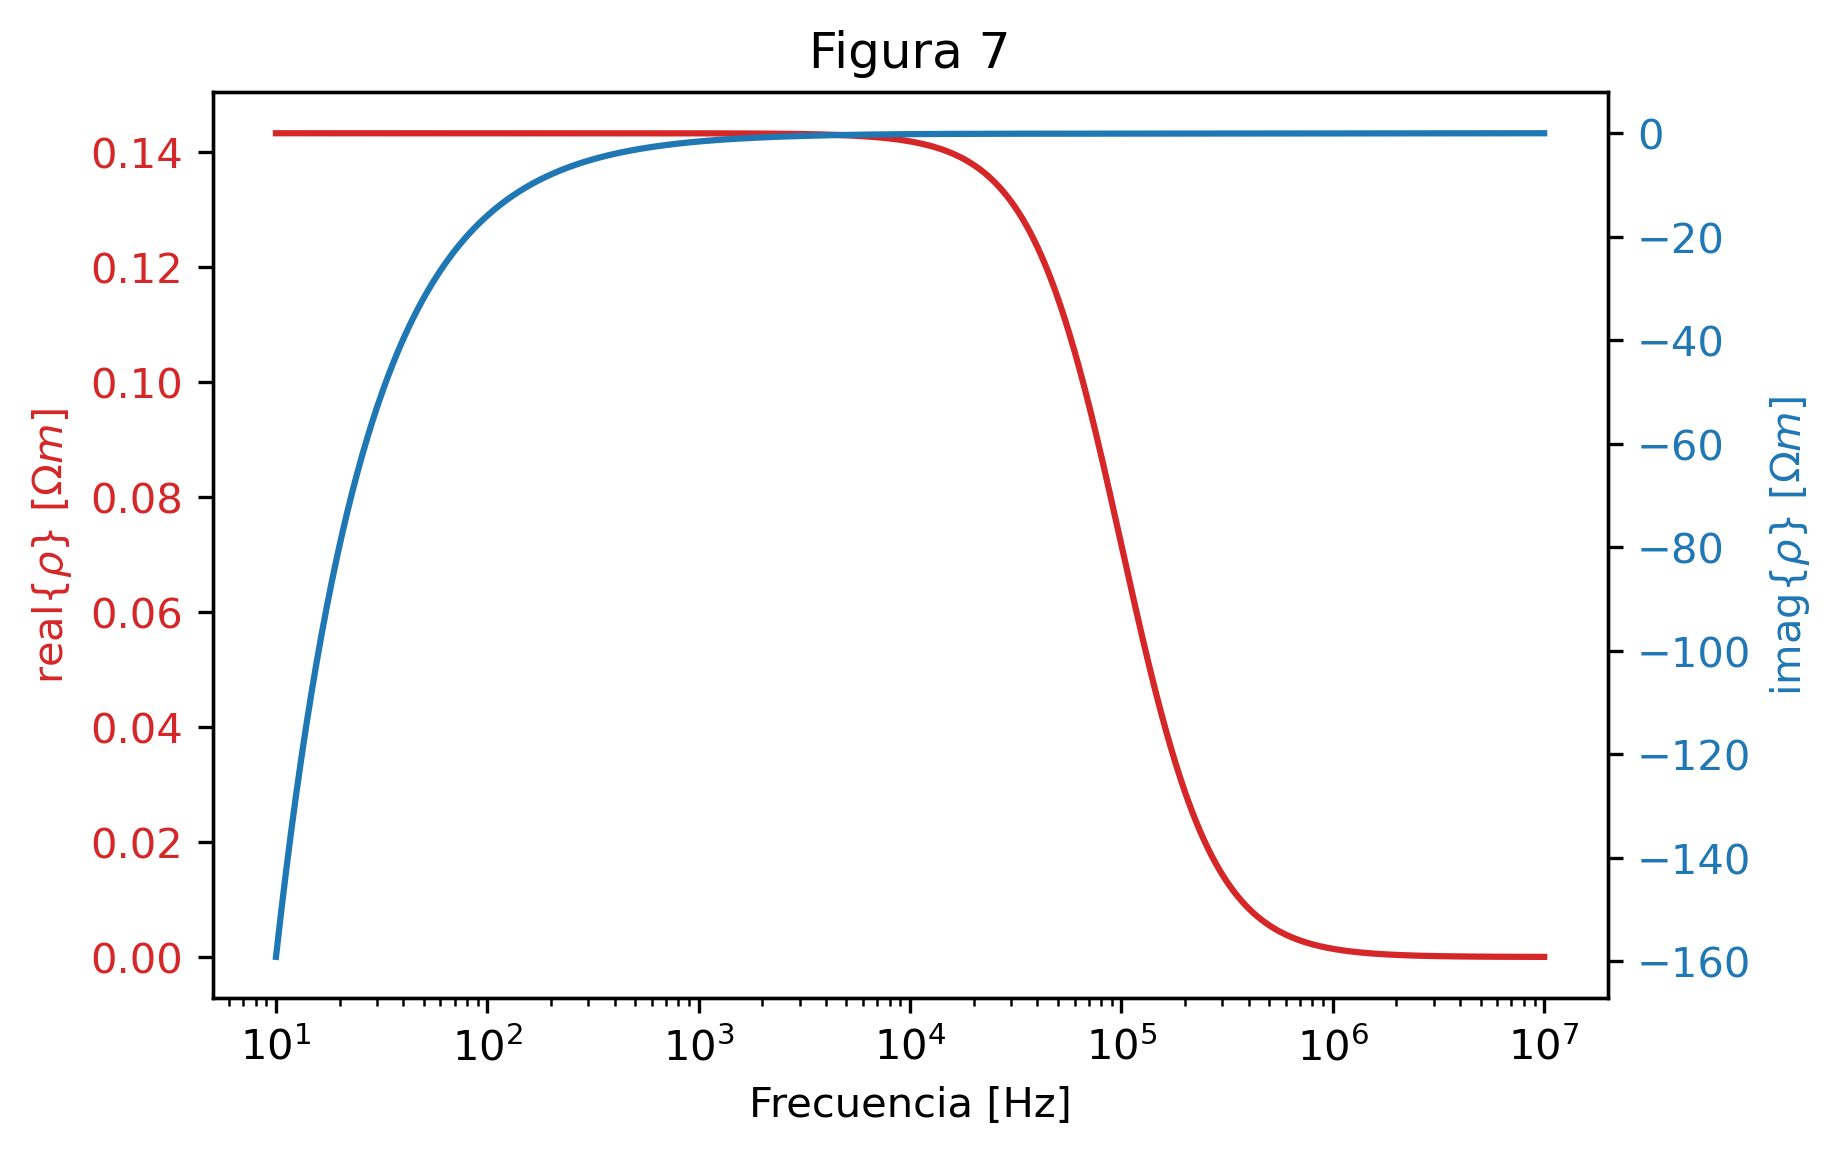

In [14]:
plot_bode(f, rho.real, rho.imag, 
            y1_label=r'real{$\rho$} $[\Omega m]$',
            y2_label=r'imag{$\rho$} $[\Omega m]$',
            fig=7)

### 4.10. Magnitud y fase de la resistividad eléctrica

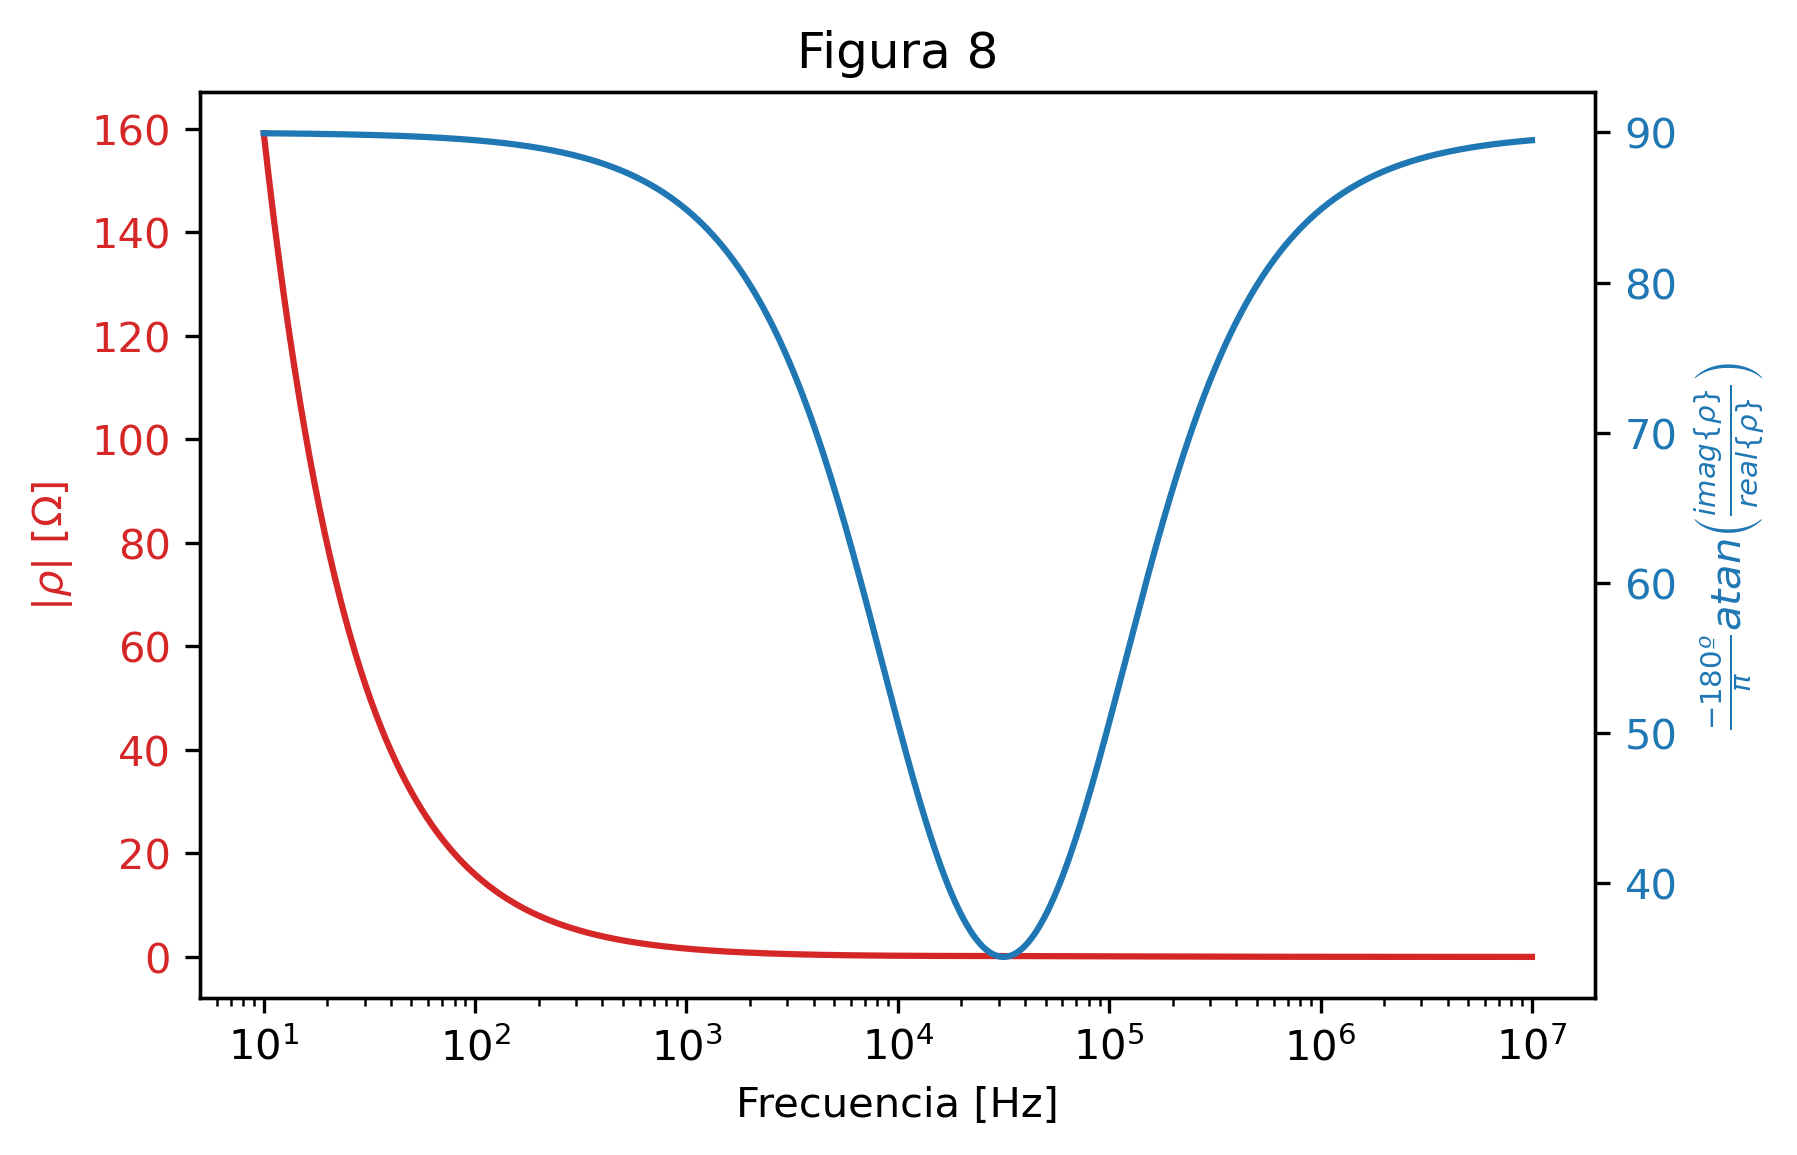

In [15]:
plot_bode(f, np.abs(rho), -180/pi *np.angle(rho), 
            y1_label=r'$|\rho|$ $[\Omega]$',
            y2_label=r'$\frac{-180º}{\pi}atan\left(\frac{imag\{\rho\}}{real\{\rho\}}\right)$',
            fig=8)

### 4.11. Diagrama de Nyquist de la resistividad eléctrica

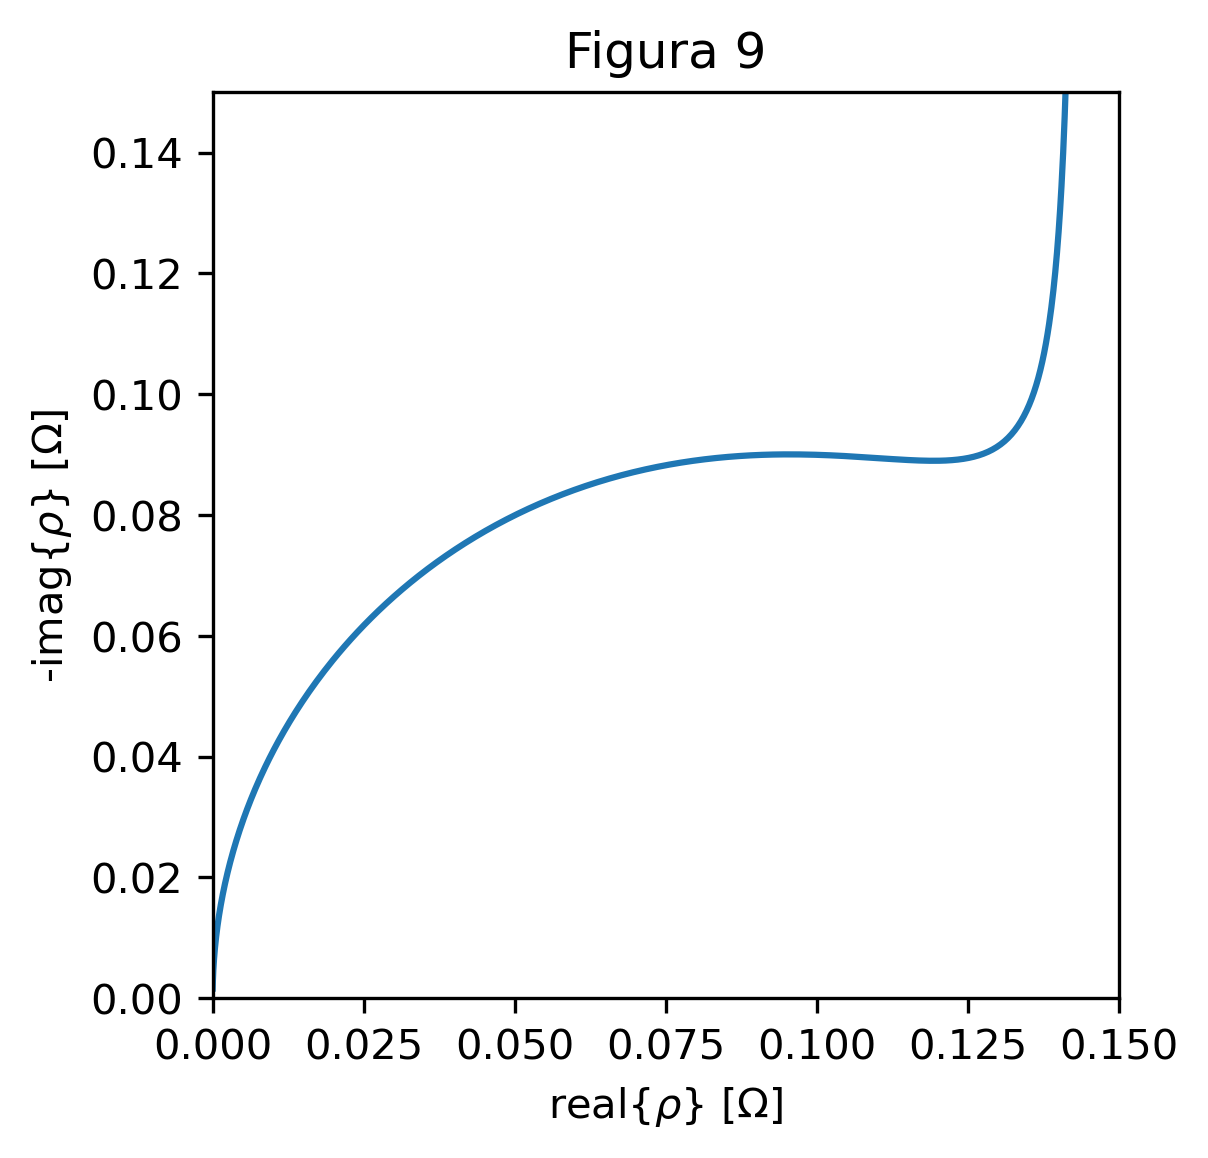

In [16]:
plot_nyquist(rho.real, -rho.imag, 
             xlabel=r'real{$\rho$} $[\Omega]$', 
             ylabel=r'-imag{$\rho$} $[\Omega]$', 
             fig=9)
_ = plt.axis([0, 0.15, 0, 0.15])

## 5. Preguntas de autoexplicación

### 5.1. Primer bloque de preguntas

5.1.1. Describa, con sus propias palabras, el ejemplo resuelto en este <i>Worked Example</i>.

5.1.2. Explique la relación entre impedancia, admitancia, capacitancia compleja, permitividad, coductividad y resistividad eléctrica.

5.1.3. En este ejemplo se presentan diferentes representaciones de las propiedades eléctricas de un material, ¿cuál considera es la más apropiada? Argumente su respuesta.

5.1.4. Note que las propiedades eléctricas representadas en los diagramas de Bode están representadas por pares, ¿cuál es la razón de esto? Argumente su respuesta.

5.1.5. ¿Cuáles son las similitudes y diferencias entre los diagramas de Bode y los de Nyquist? Se sugiere hacer un cuadro comparativo.

### 5.2. Segundo bloque de preguntas


5.2.1. ¿Por qué en la Figura 1 se grafica $-imag\{\varepsilon\}$ en vez de $imag\{\varepsilon\}$?

5.2.2. En las Figuras 1 y 2 ¿cuál es el propósito de tener dos colores y dos escalas?

5.2.3. ¿Cuáles similitudes y diferencias observa entre las Figuras 1 y 2?

5.2.4. Escriba las ecuaciones paramétrica para la circunferencia observada en la Figura 3 y verifique que dichas ecuaciones describen los datos de la Figura.

5.2.5. ¿Cómo varía la Figura 3 si en vez de graficar $-imag\{\varepsilon\}$ grafica $imag\{\varepsilon\}$?

### 5.3. Tercer bloque de preguntas

5.3.1. Compare las figuras de la permitividad compleja con las de la conductividad compleja, ¿qué similitudes y diferencias observa?

5.3.2. Compare las figuras de la permitividad compleja con las de la resistividad compleja, ¿qué similitudes y diferencias observa?

5.3.3. Realice las suposiciones necesarias y grafique la capacitancia compleja, ¿cómo se relaciona con las figuras para la permitividad eléctrica?

5.3.4. Realice las suposiciones necesarias y grafique la admitancia, ¿cómo se relaciona con las figuras para la conductividad eléctrica?

5.3.5. Realice las suposiciones necesarias y grafique la impedancia, ¿cómo se relaciona con las figuras para la resistividad eléctrica?

End!